In [37]:
#instalação de pacotes necessários
#install.packages("e1071")
#install.packages("caret")
#install.packages("mlbench")
#install.packages("mice")
#install.packages("Metrics")
#install.packages("randomForest")
library(caret)
library(mlbench)
library(mice)
library(Metrics)
library("randomForest")


In [38]:
#carregamento da base
dados <- read.csv("databases/6 - Veiculos - Dados.csv")
head(dados)
dados$a <- NULL

,a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
2,2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
3,3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
4,4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
5,5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
6,6,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


In [39]:
#retirando coluna de id e separando em bases de treino e teste

set.seed(2034)
indice <- createDataPartition(dados$tipo, p = 0.8, list = FALSE)

treino <- dados[indice, ]
teste <- dados[-indice, ]

### KNN
---

In [40]:
#treinando o modelo usando KNN e mostrando as metricas
set.seed(2034)
tune_grid <- expand.grid(k = c(1, 3, 5, 7, 9, 10))
knn <- train(tipo ~ ., data = treino, method = "knn", tuneGrid = tune_grid)
knn

#fazendo a predicaõ na base de teste
predito_knn <- predict(knn, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_knn, as.factor(teste$tipo))

k-Nearest Neighbors 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.6234427  0.4976681
   3  0.6085923  0.4777622
   5  0.6099536  0.4799653
   7  0.6051607  0.4736071
   9  0.6100306  0.4803680
  10  0.6067895  0.4762366

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   37    4    8   3
      opel   2   18   15   0
      saab   3   18   18   1
      van    1    2    2  35

Overall Statistics
                                         
               Accuracy : 0.6467         
                 95% CI : (0.5691, 0.719)
    No Information Rate : 0.2575         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.5286         
                                         
 Mcnemar's Test P-Value : 0.3649         

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8605      0.4286      0.4186     0.8974
Specificity              0.8790      0.8640      0.8226     0.9609
Pos Pred Value           0.7115      0.5143      0.4500     0.8750
Neg Pred Value           0.9478      0.8182      0.8031     0.9685
Prevalence               0.2575      0.2515   

### RNA com hold-out e cross-validation
---

In [41]:
#treinando o modelo usando RNA com hold-out e mostrando as metricas
set.seed(2034)
rna <- train(tipo ~ ., data = treino, method = "nnet")
rna

#fazendo a predicaõ na base de teste
predito_rna <- predict(rna, teste)


#apresentando a matriz de confusão

confusionMatrix(predito_rna, as.factor(teste$tipo))


# weights:  27
initial  value 1005.102914 
final  value 937.337811 
converged
# weights:  73
initial  value 1051.500123 
iter  10 value 937.791533
final  value 937.337811 
converged
# weights:  119
initial  value 1097.225159 
iter  10 value 845.165430
iter  20 value 793.167498
iter  30 value 719.186811
iter  40 value 687.666164
iter  50 value 641.050024
iter  60 value 628.362395
iter  70 value 624.605867
iter  80 value 622.498945
iter  90 value 621.703123
iter 100 value 621.163065
final  value 621.163065 
stopped after 100 iterations
# weights:  27
initial  value 991.928033 
iter  10 value 882.050776
iter  20 value 786.354105
iter  30 value 684.813588
iter  40 value 648.121702
iter  50 value 646.189720
iter  60 value 642.685205
iter  70 value 640.929923
iter  80 value 631.345269
iter  90 value 629.549103
iter 100 value 629.531994
final  value 629.531994 
stopped after 100 iterations
# weights:  73
initial  value 968.899186 
iter  10 value 921.514525
iter  20 value 871.621799
iter  30 v

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa      
  1     0e+00  0.2645689  0.032184844
  1     1e-04  0.2392126  0.000414333
  1     1e-01  0.4197430  0.233407939
  3     0e+00  0.3145388  0.095260527
  3     1e-04  0.2836433  0.057345252
  3     1e-01  0.5203273  0.366340003
  5     0e+00  0.3178558  0.104869168
  5     1e-04  0.3505781  0.144795537
  5     1e-01  0.5593566  0.417025930

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   34    4    2   0
      opel   8   35   41   2
      saab   0    0    0   0
      van    1    3    0  37

Overall Statistics
                                          
               Accuracy : 0.6347          
                 95% CI : (0.5568, 0.7078)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5139          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.7907      0.8333      0.0000     0.9487
Specificity              0.9516      0.5920      1.0000     0.9688
Pos Pred Value           0.8500      0.4070         NaN     0.9024
Neg Pred Value           0.9291      0.9136      0.7425     0.9841
Prevalence               0.2575      

In [42]:
#treinando o modelo usando RNA com crossvalidation e mostrando as metricas
set.seed(2034)
ctrl <- trainControl(method = "cv", number = 10)
rna <- train(tipo ~ ., data = treino, method = "nnet", trControl = ctrl)
rna

#fazendo a predicaõ na base de teste
predito_rna <- predict(rna, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_rna, as.factor(teste$tipo))


# weights:  27
initial  value 906.124201 
final  value 846.646573 
converged
# weights:  73
initial  value 939.875993 
iter  10 value 846.796514
iter  20 value 819.052742
iter  30 value 754.453690
iter  40 value 707.179977
iter  50 value 662.675620
iter  60 value 607.400971
iter  70 value 577.545109
iter  80 value 563.299631
iter  90 value 533.353911
iter 100 value 525.632256
final  value 525.632256 
stopped after 100 iterations
# weights:  119
initial  value 965.412702 
iter  10 value 831.122077
iter  20 value 732.410860
iter  30 value 693.227387
iter  40 value 684.372116
iter  50 value 671.564924
iter  60 value 669.453995
iter  70 value 659.142704
iter  80 value 595.454603
iter  90 value 588.665118
iter 100 value 580.446962
final  value 580.446962 
stopped after 100 iterations
# weights:  27
initial  value 893.496712 
iter  10 value 847.029102
iter  20 value 846.647360
iter  30 value 843.691223
iter  40 value 840.374239
iter  50 value 738.329383
iter  60 value 583.860479
iter  70 val

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 611, 611, 611, 612, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.2782933  0.03028002
  1     1e-04  0.2694698  0.01934779
  1     1e-01  0.4873354  0.31730715
  3     0e+00  0.3715336  0.15643794
  3     1e-04  0.2976130  0.05802495
  3     1e-01  0.6271669  0.50185256
  5     0e+00  0.4283983  0.23422362
  5     1e-04  0.3504476  0.13133560
  5     1e-01  0.6467204  0.52917410

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   38    2    2  20
      opel   2   33   39   1
      saab   0    3    0   0
      van    3    4    2  18

Overall Statistics
                                          
               Accuracy : 0.5329          
                 95% CI : (0.4543, 0.6104)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : 3.395e-14       
                                          
                  Kappa : 0.3765          
                                          
 Mcnemar's Test P-Value : 6.730e-09       

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8837      0.7857     0.00000     0.4615
Specificity              0.8065      0.6640     0.97581     0.9297
Pos Pred Value           0.6129      0.4400     0.00000     0.6667
Neg Pred Value           0.9524      0.9022     0.73780     0.8500
Prevalence               0.2575      

### SVM com hold-out e crossvalidation
---

In [43]:
#treinando o modelo usando svm com hold-out e mostrando as metricas
set.seed(2034)
tune_grid <- expand.grid(C = c(1, 2, 10, 50, 100), sigma = c(.021, .015, 0.2))

svm <- train(tipo ~ ., data = treino, method = "svmRadial", tuneGrid = tune_grid)
svm

#fazendo a predicaõ na base de teste
predito_svm <- predict(svm, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_svm, as.factor(teste$tipo))

Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  C    sigma  Accuracy   Kappa    
    1  0.015  0.7247205  0.6341478
    1  0.021  0.7365847  0.6496064
    1  0.200  0.7455213  0.6607582
    2  0.015  0.7501763  0.6674508
    2  0.021  0.7577766  0.6773871
    2  0.200  0.7574249  0.6764268
   10  0.015  0.7900364  0.7198914
   10  0.021  0.7974014  0.7296884
   10  0.200  0.7630765  0.6838460
   50  0.015  0.8173596  0.7562555
   50  0.021  0.8212384  0.7613628
   50  0.200  0.7657403  0.6873810
  100  0.015  0.8224106  0.7628667
  100  0.021  0.8259526  0.7676353
  100  0.200  0.7657403  0.6873810

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.021 and C = 100.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   43    0    0   0
      opel   0   34   11   1
      saab   0    8   31   0
      van    0    0    1  38

Overall Statistics
                                          
               Accuracy : 0.8743          
                 95% CI : (0.8142, 0.9204)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8323          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              1.0000      0.8095      0.7209     0.9744
Specificity              1.0000      0.9040      0.9355     0.9922
Pos Pred Value           1.0000      0.7391      0.7949     0.9744
Neg Pred Value           1.0000      0.9339      0.9062     0.9922
Prevalence               0.2575      

In [44]:
#treinando o modelo usando svm com crossvalidation e mostrando as metricas
set.seed(2034)
tune_grid <- expand.grid(C = c(1, 2, 10, 50, 100), sigma = c(.021, .015, 0.2))
ctrl <- trainControl(method = "cv", number = 10)

svm <- train(tipo ~ ., data = treino, method = "svmRadial", tuneGrid = tune_grid, trControl = ctrl)
svm

#fazendo a predicaõ na base de teste
predito_svm <- predict(svm, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_svm, as.factor(teste$tipo))


Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 611, 611, 611, 612, ... 
Resampling results across tuning parameters:

  C    sigma  Accuracy   Kappa    
    1  0.015  0.7410651  0.6551863
    1  0.021  0.7409780  0.6549758
    1  0.200  0.7703283  0.6938567
    2  0.015  0.7556206  0.6744179
    2  0.021  0.7527013  0.6703841
    2  0.200  0.7747401  0.6995831
   10  0.015  0.8013010  0.7350220
   10  0.021  0.8069897  0.7425540
   10  0.200  0.7821583  0.7094123
   50  0.015  0.8394737  0.7859100
   50  0.021  0.8498343  0.7997213
   50  0.200  0.7909831  0.7211510
  100  0.015  0.8482113  0.7975090
  100  0.021  0.8409229  0.7877938
  100  0.200  0.7909831  0.7211510

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.021 and C = 50.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   43    0    0   0
      opel   0   35   12   0
      saab   0    6   30   0
      van    0    1    1  39

Overall Statistics
                                          
               Accuracy : 0.8802          
                 95% CI : (0.8211, 0.9253)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8403          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              1.0000      0.8333      0.6977     1.0000
Specificity              1.0000      0.9040      0.9516     0.9844
Pos Pred Value           1.0000      0.7447      0.8333     0.9512
Neg Pred Value           1.0000      0.9417      0.9008     1.0000
Prevalence               0.2575      

### Random Forest com hold-out e Crossvalidation
---

In [45]:
#treinando o modelo usando svm com hold-out e mostrando as metricas
set.seed(2034)

rf <- train(tipo ~ ., data = treino, method = "rf")
rf

#fazendo a predicaõ na base de teste
predito_rf <- predict(rf, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_rf, as.factor(teste$tipo))

Random Forest 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7322468  0.6432273
  10    0.7308355  0.6411376
  18    0.7237005  0.6316208

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   43    0    3   0
      opel   0   22   16   0
      saab   0   17   23   1
      van    0    3    1  38

Overall Statistics
                                         
               Accuracy : 0.7545         
                 95% CI : (0.682, 0.8177)
    No Information Rate : 0.2575         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6726         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              1.0000      0.5238      0.5349     0.9744
Specificity              0.9758      0.8720      0.8548     0.9688
Pos Pred Value           0.9348      0.5789      0.5610     0.9048
Neg Pred Value           1.0000      0.8450      0.8413     0.9920
Prevalence               0.2575      0.2515   

In [46]:
#treinando o modelo usando svm com crossvalidarion e mostrando as metricas
set.seed(2034)
ctrl <- trainControl(method = "cv", number = 10)
rf <- train(tipo ~ ., data = treino, method = "rf", trControl = ctrl)
rf

#fazendo a predicaõ na base de teste
predito_rf <- predict(rf, teste)

#apresentando a matriz de confusão

confusionMatrix(predito_rf, as.factor(teste$tipo))


Random Forest 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 611, 611, 611, 612, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7392904  0.6524819
  10    0.7392911  0.6524566
  18    0.7348787  0.6465096

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   43    0    4   0
      opel   0   24   14   0
      saab   0   16   23   1
      van    0    2    2  38

Overall Statistics
                                          
               Accuracy : 0.7665          
                 95% CI : (0.6949, 0.8284)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6886          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              1.0000      0.5714      0.5349     0.9744
Specificity              0.9677      0.8880      0.8629     0.9688
Pos Pred Value           0.9149      0.6316      0.5750     0.9048
Neg Pred Value           1.0000      0.8605      0.8425     0.9920
Prevalence               0.2575      

### K-means
---

In [47]:
set.seed(2034)

km_res <- kmeans(dados[, 0:(ncol(dados) - 1)], 10)
print(km_res)

table(km_res$cluster, dados$tipo)

K-means clustering with 10 clusters of sizes 56, 24, 78, 112, 71, 135, 47, 77, 184, 62

Cluster means:
        Comp     Circ     DCirc    RadRa PrAxisRa    MaxLRa   ScatRa    Elong
1  101.60714 49.48214  99.46429 206.4107 64.37500  9.250000 199.2679 33.00000
2  107.25000 55.54167 103.41667 190.2500 55.79167  5.791667 248.7083 26.87500
3  103.87179 52.53846 103.02564 196.6282 61.26923 10.192308 211.5000 31.38462
4   90.13393 45.58929  79.35714 154.4464 61.97321  9.125000 155.8839 43.12500
5   94.05634 42.77465  82.71831 186.6901 63.95775  7.535211 171.1408 38.23944
6   87.64444 37.80741  62.05926 130.1852 56.80000  6.407407 128.0148 52.65185
7   97.85106 46.89362  93.17021 199.2553 64.40426  8.617021 186.2128 35.19149
8  104.24675 54.16883 102.74026 206.5325 63.44156 10.636364 220.5325 30.29870
9   86.83152 41.85326  71.48913 143.7120 59.67391  7.375000 146.4620 45.75000
10  91.58065 39.16129  77.03226 187.4677 71.41935 12.790323 155.4677 42.43548
   PrAxisRect MaxLRect ScVarMaxis ScVar

    
     bus opel saab van
  1   10   24   22   0
  2   24    0    0   0
  3    5   33   40   0
  4   28   11    9  64
  5   22   22   27   0
  6    0   27   26  82
  7   10   18   19   0
  8    6   41   30   0
  9   91   25   25  43
  10  22   11   19  10

In [48]:
# Instalar e carregar pacotes
#install.packages("ggplot2")
#install.packages("cluster")
library(ggplot2)
library(cluster)

# Supondo que df é o seu dataframe com as variáveis para clusterização
# set.seed para reprodutibilidade
set.seed(2034)

# Número de clusters
k <- 10

# Realizar a clusterização com k-means
kmeans_result <- kmeans(dados[, 0:(ncol(dados) - 1)], 10)

# Adicionar os clusters ao dataframe original
dados$cluster <- as.factor(kmeans_result$cluster)



,1,2,3,4,5,6,7,8,9,10,MeanDecreaseAccuracy,MeanDecreaseGini
Comp,3.8388236,6.157623,5.3906614,4.496740,4.4045489,3.05067456,2.2887925,5.863296,9.2967165,4.400246,10.423389,10.254610
Circ,6.1474637,9.224122,8.5830049,16.201523,10.2578023,13.04789922,6.2969396,8.322452,10.0674700,17.762519,21.020154,29.262392
DCirc,8.3532169,10.007747,10.6157772,9.986915,7.3818067,8.06156028,4.2244748,8.230058,12.5884992,8.460157,14.820737,20.317676
RadRa,13.7007027,3.298374,4.2738716,15.371041,12.2896510,11.29095018,11.8212143,11.203837,18.1693603,12.473584,22.075586,33.839745
PrAxisRa,4.0672109,3.422987,1.3629027,5.932259,0.6695082,4.39703588,1.4380157,2.200699,7.9777058,9.447293,14.079959,7.704005
MaxLRa,2.3965428,6.081828,3.1858841,3.766727,5.0963050,2.79148205,2.0024965,5.213244,6.3011280,10.056507,8.701292,8.450248
ScatRa,25.4932337,24.261680,24.5552233,20.642520,26.8013359,14.36357228,26.3513018,25.213126,18.1844416,16.684053,38.730730,132.224419
Elong,21.9565209,19.476445,20.6799591,23.564979,26.5949986,15.15491314,22.4757223,16.333697,18.4245847,20.000815,34.727564,114.357142
PrAxisRect,16.4363282,17.778068,16.4184543,10.062495,16.4557311,8.33747967,15.4109282,13.775669,9.3146763,8.517907,19.557490,53.799374
MaxLRect,7.2201377,7.159997,7.2457031,14.039782,8.8180258,7.76765922,3.8374072,7.281803,6.6842417,14.418065,18.554473,24.395559


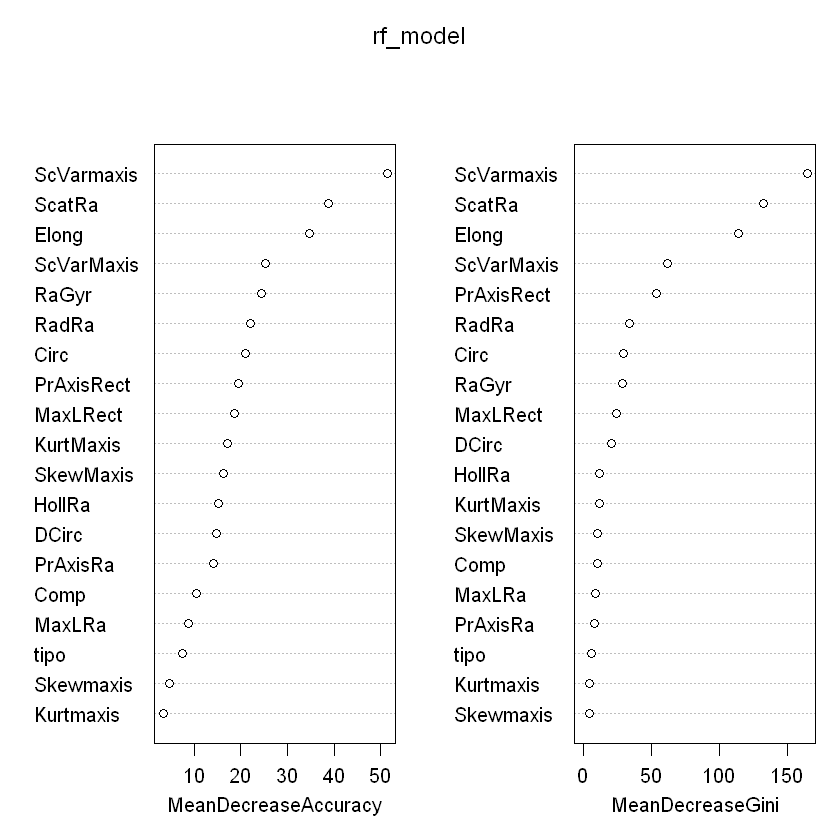

In [49]:
# Treinar o modelo de Random Forest
rf_model <- randomForest(cluster ~ ., data = dados, importance = TRUE)

# Visualizar a importância das variáveis
importance(rf_model)
varImpPlot(rf_model)

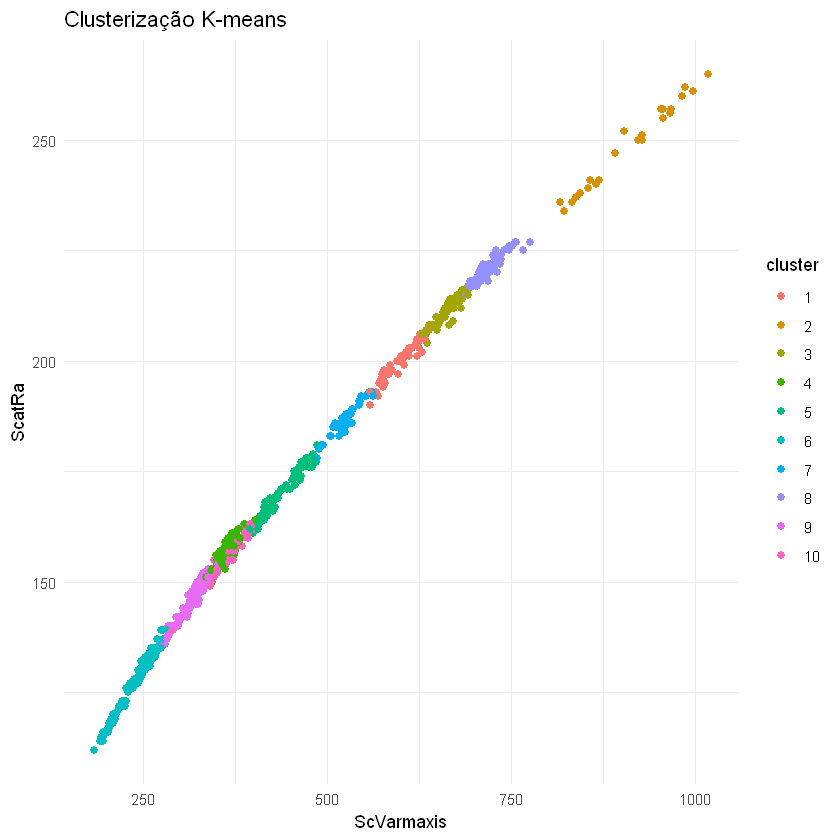

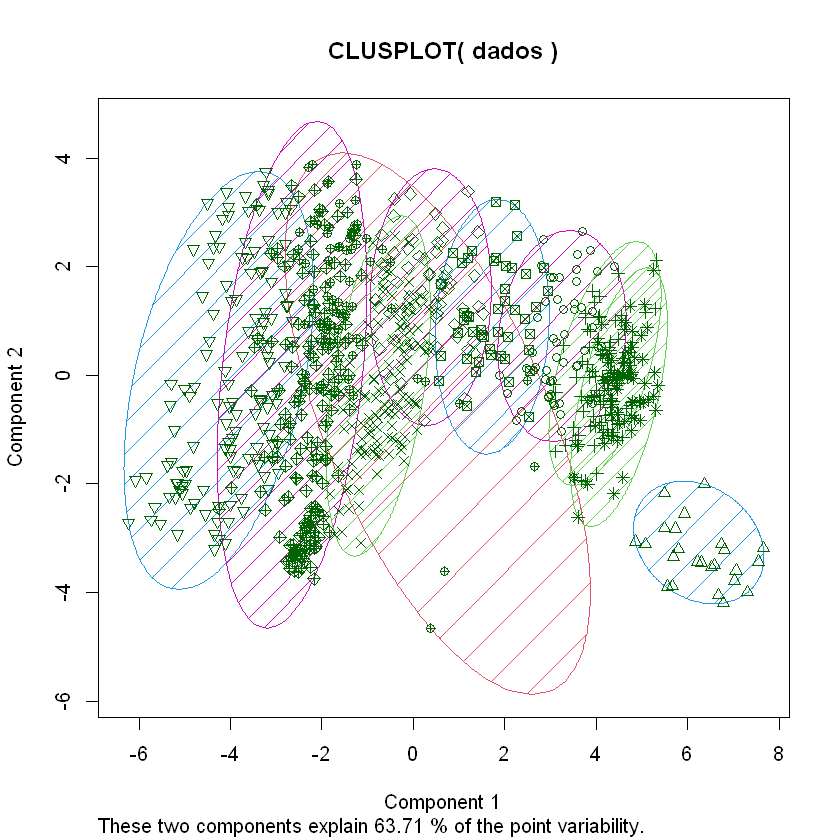

In [52]:


# Visualizar os dados com ggplot2
ggplot(dados, aes(x = ScVarmaxis, y = ScatRa, color = cluster)) +
  geom_point(size = 2) +
  labs(title = "Clusterização K-means",
       x = "ScVarmaxis",
       y = "ScatRa") +
  theme_minimal()

# Visualizar o resultado com um plot de clusters
clusplot(dados, kmeans_result$cluster, color=TRUE, shade=TRUE, lines=0)
